# Tasks

Machine Learning & Statistics

Winter 2023/24

Mohammed Mahdi

G00411358

***

## Task 1

> Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as `math`. In this task, you should write a function `sqrt(x)` to approximate the square root of a floating point number x without using the power operator or a package. 

> Rather, you should use Newton's Method. Start with an inital guess for the square root called $z_0$. You then repeatedly improve it using the following formula, until the difference between some previous guess $zi$ and the next $z_{i+1}$ is less than some threshold, say 0.01. 

$$ z_{i+1} = z_i - \frac{z_i × z_i - x}{2z_i} $$

In [1]:
def sqrt(x):
    # Initial guess for the square root
    z = x / 4.0

    # Loop until we are accurate enough
    for i in range(100):
        # Newton's method for a better approximation:
        z = z - (((z*z)-x))/(2*z)

    # z should now be a good approximation for the square root
    return z

In [2]:
# Test the function on 3
sqrt(3)

1.7320508075688774

In [3]:
# Check Pythons value for square root of 3
3**0.5

1.7320508075688772

### Notes

1. The calculation $z^2 - x$ is exactly 0 when $z$ is the square root of $x$. It is greater than 0 when $z$ is too big. It is less than 0 when $z$ is too small. Thus $(z^2 - x)^2$ is a good candidate for a cost function. 

2. The derivative of $z^2 - x$ with respect to $z$ is $2z$. That is the denominator of the fraction in the formula from the question. 

***

End

***
## Task 2

> Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use `scipy.stats` to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.

|        | Chocolate Biscuit | Plain Biscuit|
|--------|-----------|-------|
| Coffee | 43        | 57    |
| Tea    | 56        | 45    |


In [4]:
# Data frames.
import pandas as pd

# Statistics.
import scipy.stats as ss

# Shuffles.
import random

In [5]:
# Setting up 4 lists for our dataset
coffee_chocolate_biscuit = [['Coffee', 'Chocolate']] * 43
coffee_plain_biscuit = [['Coffee', 'Plain']] * 57
tea_chocolate_biscuit = [['Tea', 'Chocolate']] * 56
tea_plain_biscuit = [['Tea', 'Plain']] * 45

In [6]:
# Raw data, merge the four lists.
raw_data = coffee_chocolate_biscuit + coffee_plain_biscuit + tea_chocolate_biscuit + tea_plain_biscuit

In [7]:
# Shuffle the data.
random.shuffle(raw_data)

In [8]:
# Zip the list - make the rows columns and the columns rows.
# Interchanges the outer and inner lists.
drink, biscuit = list(zip(*raw_data))

In [9]:
# Create a data frame.
df = pd.DataFrame({'Drink': drink, 'Biscuit': biscuit})

# Show.
df

,Drink,Biscuit
0,Coffee,Chocolate
1,Coffee,Plain
2,Coffee,Plain
3,Tea,Chocolate
4,Coffee,Chocolate
...,...,...
196,Tea,Chocolate
197,Tea,Plain
198,Coffee,Chocolate
199,Coffee,Plain


### Contingency Table

In [10]:
# Perform Crosstabs Contingency.
cross = ss.contingency.crosstab(df['Drink'], df['Biscuit'])

# Show.
cross

CrosstabResult(elements=(array(['Coffee', 'Tea'], dtype=object), array(['Chocolate', 'Plain'], dtype=object)), count=array([[43, 57],
       [56, 45]]))

In [11]:
# The first variable values, and the second.
first, second = cross.elements

# Show.
first, second

(array(['Coffee', 'Tea'], dtype=object),
 array(['Chocolate', 'Plain'], dtype=object))

### Statistical Test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [12]:
# The counts.
cross.count

array([[43, 57],
       [56, 45]])

### Perform Chi-Square Test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [13]:
# Statistics
result = ss.chi2_contingency(cross.count, correction=False)

# Show?
result

Chi2ContingencyResult(statistic=3.113937364324669, pvalue=0.07762509678333357, dof=1, expected_freq=array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]]))

In [14]:
# The expected fequencies if independent.
result.expected_freq

array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]])

### Verify no relationship based on the Chi-Square Test

In [15]:
# If no relationship between drink and biscuit preference,
# then we should have same proportion of coffee preference
# liking chocolate biscuits as we have overall.
100 * (99 / 201)

49.25373134328358

In [16]:
# If no relationship between drink and biscuit preference,
# then we should have same proportion of coffee preference
# liking plain biscuits as we have overall.
100 * (102 / 201)

50.74626865671642

In [17]:
# If no relationship between drink and biscuit preference,
# then we should have same proportion of tea preference
# liking chocolate biscuits as we have overall.
101 * (99 / 201)

49.74626865671642

In [18]:
# If no relationship between drink and biscuit preference,
# then we should have same proportion of tea preference
# liking plain biscuits as we have overall.
101 * (102 / 201)

51.25373134328358

***
### Notes

Performing a Chi-Square Test, the following results are observed: 

Chi2ContingencyResult(statistic=3.113937364324669, pvalue=0.07762509678333357, dof=1, expected_freq=array([[49.25373134, 50.74626866], [49.74626866, 51.25373134]]))

1. The p-value is small indicating that it is unlikely that there is a relationship between the variables, a p-value of 0.5 would mean a 50% relational probability. 

2. The expected_freq was verified based on the proportionality of preferences when computed with consideration to actual preferences. 

Ref: https://sites.radford.edu/~biol-web/stats/chi-sq_explanation.doc#:~:text=Interpretation,really%20is%20a%20significant%20difference.

3. The statistic of 3.11 is low indicating that the expected results are close to the actual data, meaning the 'goodness of fit' is accuarate

Ref: https://www.investopedia.com/terms/c/chi-square-statistic.asp

4. New datasets created below to test the results when relationships are inferred

***

In [19]:
# Setting up 4 lists for our dataset
coffee_chocolate_biscuit2 = [['Coffee', 'Chocolate']] * 99
coffee_plain_biscuit2 = [['Coffee', 'Plain']] * 1
tea_chocolate_biscuit2 = [['Tea', 'Chocolate']] * 2
tea_plain_biscuit2 = [['Tea', 'Plain']] * 98
raw_data2 = coffee_chocolate_biscuit2 + coffee_plain_biscuit2 + tea_chocolate_biscuit2 + tea_plain_biscuit2

In [20]:
drink2, biscuit2 = list(zip(*raw_data2))
df2 = pd.DataFrame({'Drink2': drink2, 'Biscuit2': biscuit2})
cross2 = ss.contingency.crosstab(df2['Drink2'], df2['Biscuit2'])
first2, second2 = cross2.elements
cross2.count

array([[99,  1],
       [ 2, 98]])

In [21]:
result2 = ss.chi2_contingency(cross2.count, correction=False)
result2

Chi2ContingencyResult(statistic=188.1988198819882, pvalue=7.861390490984109e-43, dof=1, expected_freq=array([[50.5, 49.5],
       [50.5, 49.5]]))

P-Value is very close to 0 indicating that this observation is highly unlikely to be due to chance.

Ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4111019/#:~:text=Values%20close%20to%200%20indicate,other%20than%20due%20to%20chance.

The statistic of 188 is very high indicating that the expected results are very far from the actual data, meaning the 'goodness of fit' is skewed

Ref: https://www.investopedia.com/terms/c/chi-square-statistic.asp
***

In [22]:
# Setting up 4 lists for our dataset
coffee_chocolate_biscuit3 = [['Coffee', 'Chocolate']] * 49
coffee_plain_biscuit3 = [['Coffee', 'Plain']] * 51
tea_chocolate_biscuit3 = [['Tea', 'Chocolate']] * 52
tea_plain_biscuit3 = [['Tea', 'Plain']] * 48
raw_data3 = coffee_chocolate_biscuit3 + coffee_plain_biscuit3 + tea_chocolate_biscuit3 + tea_plain_biscuit3
drink3, biscuit3 = list(zip(*raw_data3))
df3 = pd.DataFrame({'Drink3': drink3, 'Biscuit3': biscuit3})
cross3 = ss.contingency.crosstab(df3['Drink3'], df3['Biscuit3'])
first3, second3 = cross3.elements
cross3.count

array([[49, 51],
       [52, 48]])

In [23]:
result3 = ss.chi2_contingency(cross3.count, correction=False)
result3

Chi2ContingencyResult(statistic=0.18001800180018002, pvalue=0.6713577705365845, dof=1, expected_freq=array([[50.5, 49.5],
       [50.5, 49.5]]))

P-Value is high indicating that this observation is highly likely to be due to chance

Ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4111019/#:~:text=Values%20close%20to%200%20indicate,other%20than%20due%20to%20chance.

The statistic of 0.18 is very low indicating that the expected results are very close to the actual data, meaning the 'goodness of fit' is accuarate

Ref: https://www.investopedia.com/terms/c/chi-square-statistic.asp

***

End
***

## Task 3

> Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.

In [24]:
# Plots.
import matplotlib.pyplot as plt

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Statistics.
import scipy.stats as ss

In [27]:
# Load Penguins dataset.
df = pd.read_csv('data/penguins.csv')

# Show.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [28]:
# Gentoo Species Dataframe.
gentoo = df[df['species'] == 'Gentoo']

gentoo

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [29]:
# Males Gentoo Penguins Dataframe.
males = gentoo[gentoo['sex'] == 'MALE']['body_mass_g'].to_numpy()

males

array([5700., 5700., 5400., 5200., 5150., 5550., 5850., 5850., 6300.,
       5350., 5700., 5050., 5100., 5650., 5550., 5250., 6050., 5400.,
       5250., 5350., 5700., 4750., 5550., 5400., 5300., 5300., 5000.,
       5050., 5000., 5550., 5300., 5650., 5700., 5800., 5550., 5000.,
       5100., 5800., 6000., 5950., 5450., 5350., 5600., 5300., 5550.,
       5400., 5650., 5200., 4925., 5250., 5600., 5500., 5500., 5500.,
       5500., 5950., 5500., 5850., 6000., 5750., 5400.])

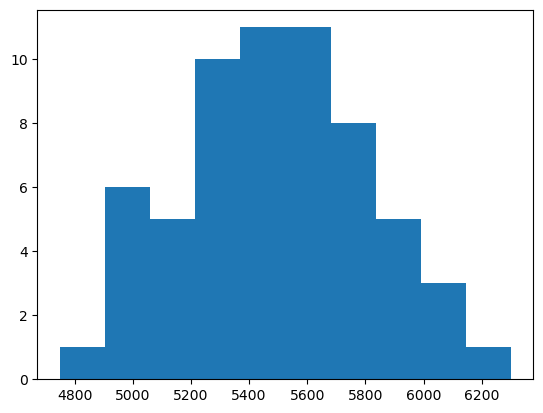

In [30]:
# Create an empty figure.
fig, ax = plt.subplots()

# Histogram of male body mass.
ax.hist(males);

In [31]:
# Females Gentoo Penguins Dataframe.
females = gentoo[gentoo['sex'] == 'FEMALE']['body_mass_g'].to_numpy()

females

array([4500., 4450., 4550., 4800., 4400., 4650., 4650., 4200., 4150.,
       4800., 5000., 4400., 5000., 4600., 4700., 5050., 5150., 4950.,
       4350., 3950., 4300., 4900., 4200., 5100., 4850., 4400., 4900.,
       4300., 4450., 4200., 4400., 4700., 4700., 4750., 5200., 4700.,
       4600., 4750., 4625., 4725., 4750., 4600., 4875., 4950., 4750.,
       4850., 4875., 4625., 4850., 4975., 4700., 4575., 5000., 4650.,
       4375., 4925., 4850., 5200.])

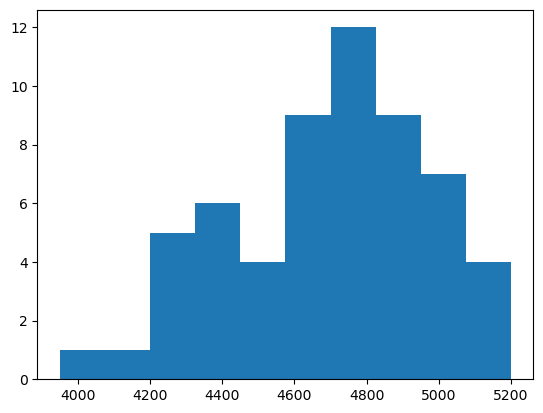

In [32]:
# Create an empty figure.
fig, ax = plt.subplots()

# Histogram of male body mass.
ax.hist(females);

In [33]:
# t-test.
ss.ttest_ind(males, females)

Ttest_indResult(statistic=14.721676481405709, pvalue=2.133687602018886e-28)

pvalue=2.133687602018886e-28

Since the pvalue is so small, this would suggest statistical significance in the body mass difference between male and female gentoo penguins. This pvalue result being so small provides evidence that the mean of male body mass is different from the mean of the female body mass. This being said, the null hypothesis can be rejected as this would assume that there is no significant difference in the average body mass of male and female gentoo penguins. 

In [34]:
ss.describe(males)

DescribeResult(nobs=61, minmax=(4750.0, 6300.0), mean=5484.836065573771, variance=98068.30601092897, skewness=0.07737748628686811, kurtosis=-0.21409006763464378)

In [35]:
ss.describe(females)

DescribeResult(nobs=58, minmax=(3950.0, 5200.0), mean=4679.741379310345, variance=79286.33545069571, skewness=-0.3289116807241043, kurtosis=-0.3723947928940565)

***

End

***
## Task 4

> Using the famous iris data set, suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.

In [36]:
# Data frames.
import pandas as pd

# Machine Learning.
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# Load iris data set.
df = pd.read_csv('data/iris.csv')

# Show.
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


From the pairplot below we can see that the setosa class is easily separated from the other 2 classes, especially for the variables 'petal length' and 'petal width'

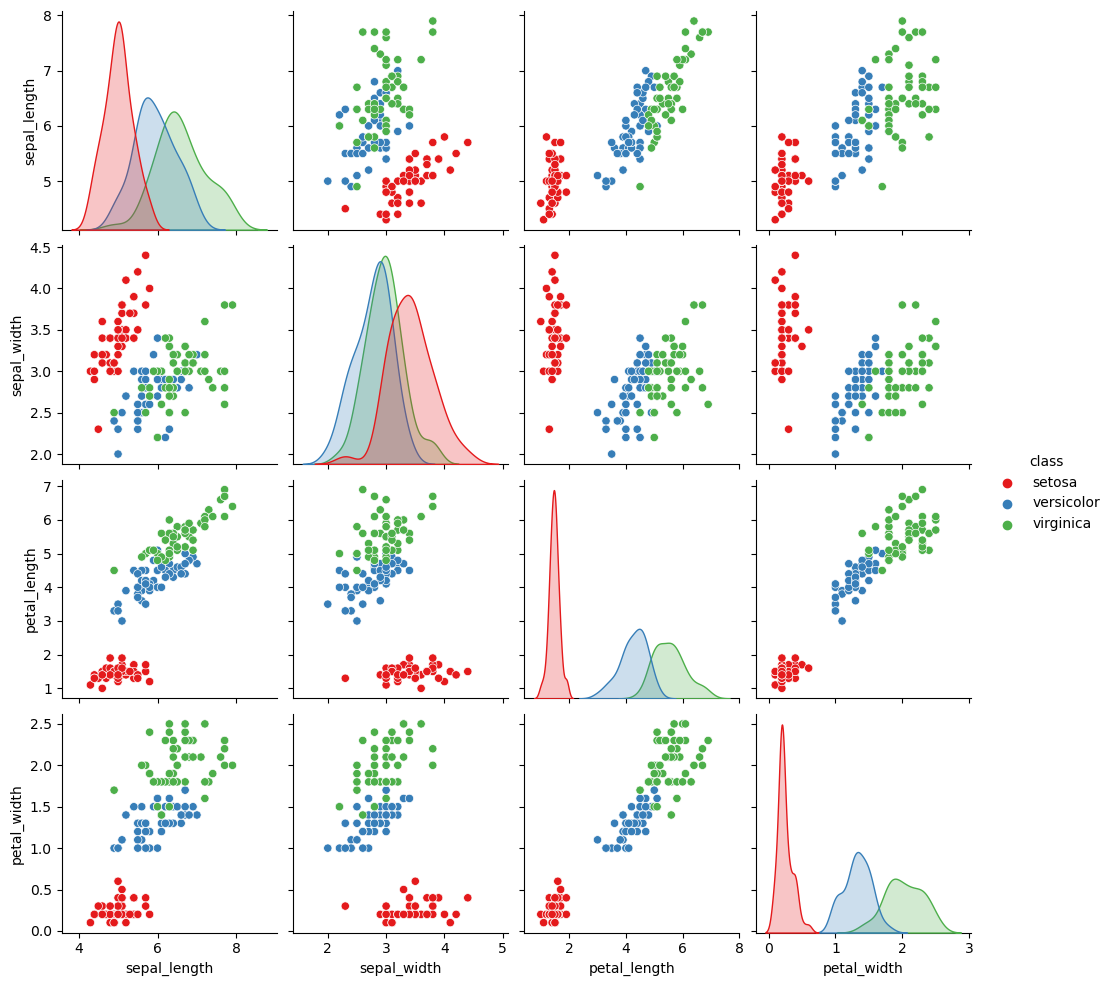

In [39]:
sns.pairplot(df, hue = 'class', vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], palette = 'Set1' );

In [40]:
df.groupby(['class']).describe()
#https://www.kaggle.com/code/kostasmar/exploring-the-iris-data-set-scikit-learn

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
class                                                                 
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
class                          ...                                        
setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
class                                          
setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

As suggested from the above plots, Setosa is easily seperated from the other classes. By removing the setosa class from the dataset based on the condition (petal_length < 2 or petal_width < 0.7) and showing the remaining Virginica and Versicolor conditions (especially count) are unchanged we will have proved the ask of the task.

In [41]:
df_new = df[df['petal_length'] > 2]
df_new

#https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/

,sepal_length,sepal_width,petal_length,petal_width,class
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [42]:
df_new.groupby(['class']).describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
class                                                                 
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
class                          ...                                        
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
class                                          
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[2 rows x 32 columns]

***

End

***
## Task 5

> Perform Principal Component Analysis on the iris data set, reducing the number of dimensions to two. Explain the purpose of the analysis and your results.

In [58]:
# Data frames.
import pandas as pd

# Machine Learning.
import sklearn as sk

# Nearest neighbors.
import sklearn.neighbors as ne

# Preprocessing.
import sklearn.preprocessing as pre

# Decomposition.
import sklearn.decomposition as dec

# Statistical test.
import scipy.stats as ss

# Plots.
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

In [43]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [44]:
# Independent variables.
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Show.
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Tests for Normality

In [67]:
# Shapiro test.
ss.shapiro(df['sepal_length'])

ShapiroResult(statistic=0.9760899543762207, pvalue=0.01018026564270258)

<Axes: >

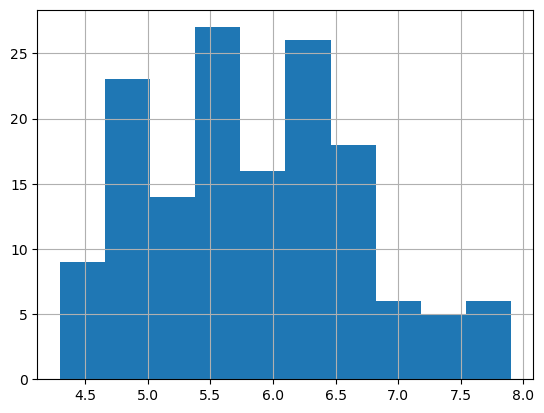

In [61]:
df['sepal_length'].hist()

In [62]:
# Shapiro test.
ss.shapiro(df['sepal_width'])

ShapiroResult(statistic=0.9837920665740967, pvalue=0.07518772780895233)

<Axes: >

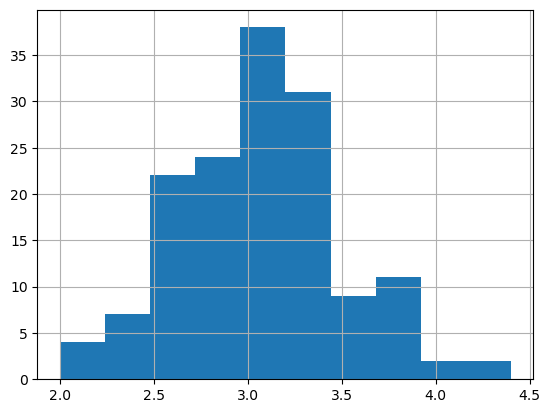

In [66]:
df['sepal_width'].hist()

In [63]:
# Shapiro test.
ss.shapiro(df['petal_length'])

ShapiroResult(statistic=0.8764244318008423, pvalue=7.545183366985952e-10)

In [65]:
# Shapiro test.
ss.shapiro(df['petal_width'])

ShapiroResult(statistic=0.9026243686676025, pvalue=1.8646931110311016e-08)

"If the Sig. value of the Shapiro-Wilk Test is greater than 0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution" (https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php)

Based on this definition we can see that the results of sepal_length are not evenly distributed as the p-value is less than 0.05 and the null hypothesis would be rejected (probablity that an event occurred randomnly i.e chances of seeing extreme data will increase with increasing statistical tests). Data from all other variables appear to be normally distributed

### Scaling Data

"Standardize features by removing the mean and scaling to unit variance."

"Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance)."

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [68]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [69]:
# Create a standard scaler.
scaler = pre.StandardScaler()

# Show.
scaler

StandardScaler()

In [70]:
# Fit the data to the scaler.
scaler.fit(X)

StandardScaler()

In [71]:
# Show the means and variances.
scaler.mean_, scaler.var_

(array([5.84333333, 3.054     , 3.75866667, 1.19866667]),
 array([0.68112222, 0.18675067, 3.09242489, 0.57853156]))

In [72]:
# Verify the above.
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [73]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


If the statistical results of the scaled data were the same as the original data, it could indicate that the scaling process did not have a noticeable impact on the distribution of the data. This might happen if the original data is already relatively close to a standard normal distribution with a mean of 0 and a standard deviation of 1.

The purpose of standardization is to transform the features so that they have zero mean and unit variance.

In [123]:
# Transformed X array.
scaled_data = scaler.transform(X)

In [124]:
# Means.
scaled_data.mean(axis=0)

array([-4.73695157e-16, -6.63173220e-16,  3.31586610e-16, -2.84217094e-16])

In [125]:
# Standard Deviations.
scaled_data.std(axis=0)

array([1., 1., 1., 1.])

In [126]:
# Differences squared between first and last row.
(scaled_data[0] - scaled_data[-1])**2

array([0.93962578, 1.33868331, 4.42694665, 4.42499631])

In [127]:
# Original column names.
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [132]:
# Re-create data frame.
df_scaled_data = pd.DataFrame(scaled_data, columns=X.columns)

# Show.
df_scaled_data

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [133]:
df_scaled_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


***
### Principal Component Analysis

Principal Component Analysis looks at a number of variables, and comes up with a combination that captures the essence of the variables. One thing to be careful of with PCA is that it is susceptible to a huge amount of variation in one variable versus the others. Ideally we would like to see variation in both. 

In [134]:
# Create a new PCA instance.
pca = dec.PCA(n_components=2)

In [160]:
# Fit and transform the standardized data
principal_components = pca.fit_transform(scaled_data)

In [144]:
# Separate features and target variable
features = df.drop('class', axis=1)
target = df['class']

In [145]:
# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
final_df = pd.concat([principal_df, target], axis=1)
final_df

,Principal Component 1,Principal Component 2,class
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


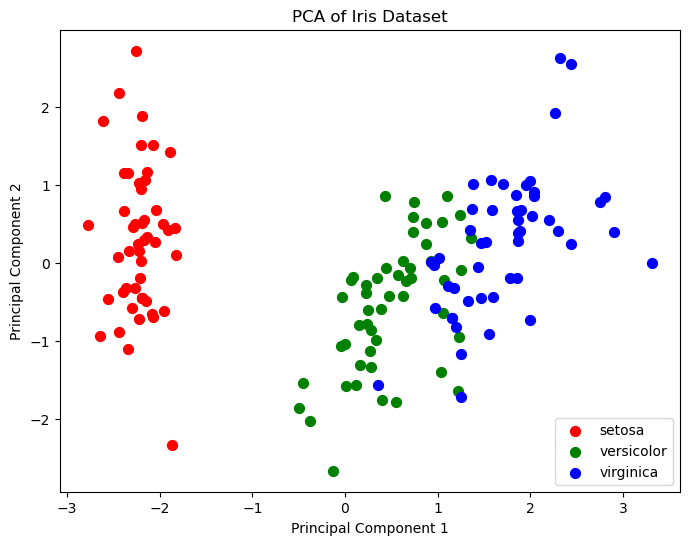

In [146]:
# Plot the results
plt.figure(figsize=(8, 6))
species = target.unique()
colors = ['r', 'g', 'b']
for specie, color in zip(species, colors):
    indices_to_keep = final_df['class'] == specie
    plt.scatter(final_df.loc[indices_to_keep, 'Principal Component 1'],
                final_df.loc[indices_to_keep, 'Principal Component 2'],
                c=color, s=50, label=specie)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Iris Dataset')
plt.show()

Text(0.5, 1.02, 'Pairplot 1 of the Iris Dataset')

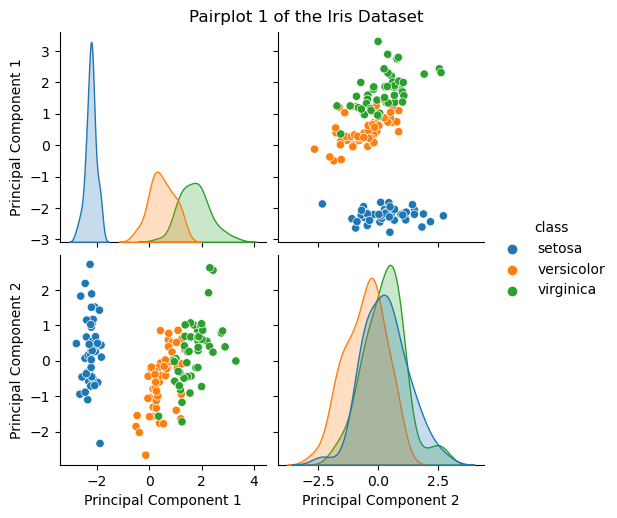

In [158]:
# Pair plot.
sns.pairplot(final_df, hue='class')
plt.suptitle('Pairplot 1 of the Iris Dataset', y=1.02)

Text(0.5, 1.02, 'Pairplot 2 of the Iris Dataset')

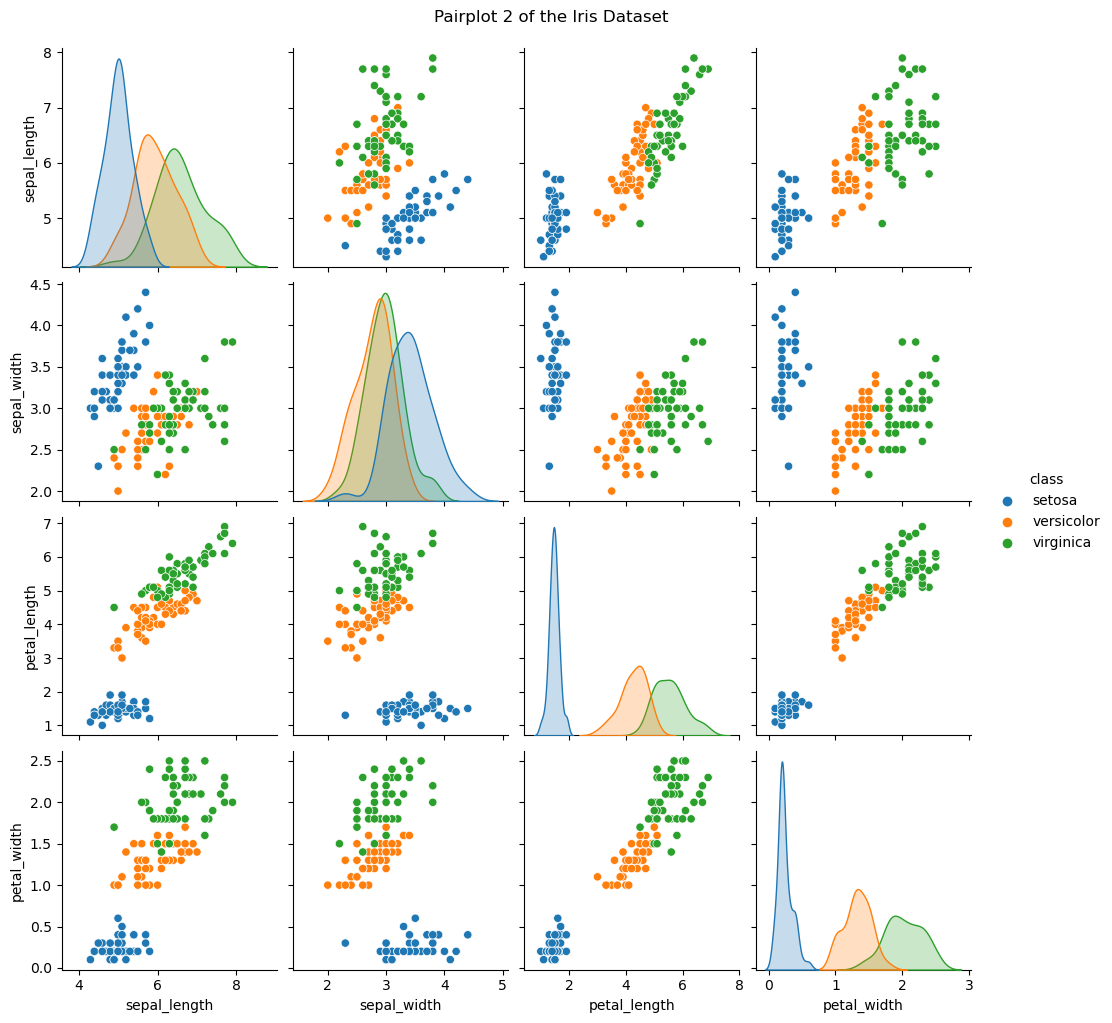

In [159]:
# Pair plot.
sns.pairplot(df, hue='class')
plt.suptitle('Pairplot 2 of the Iris Dataset', y=1.02)

***
## Notes
Through the use of PCA is we reduced the dimensionality of the iris dataset while retaining as much of the original variance as possible as is evident from the above 2 pairplots above. The use of PCA is advantageous when used for data visualization, noise reduction, and can be used to improve the efficiency of machine learning algorithms based on the first 2 benefits listed.

***
### End